Deepfake Detection using InceptionResNetV2

Importing Libraries

In [ ]:
import os
import cv2
import json
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
input_shape = (128, 128, 3)
data_dir = '/content/drive/MyDrive/RS_OEA_me/Deepfake Data Cropped'

real_data = [f for f in os.listdir(data_dir+'/Real') if f.endswith('.jpg')]
fake_data = [f for f in os.listdir(data_dir+'/Fake') if f.endswith('.png')]

X = []
Y = []

for img in real_data:
    X.append(img_to_array(load_img(data_dir+'/Real/'+img, target_size=(128, 128))).flatten() / 255.0)
    Y.append(1)
for img in fake_data:
    X.append(img_to_array(load_img(data_dir+'/Fake/'+img, target_size=(128, 128))).flatten() / 255.0)
    Y.append(0)
Y_val_org = Y
#Normalization
X = np.array(X)
Y = to_categorical(Y, 2)
#Reshape
X = X.reshape(-1, 128, 128, 3)

Splitting Data

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.4, random_state=5)

Buildling the Model

In [ ]:
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

googleNet_model = InceptionResNetV2(include_top=False, weights='imagenet', input_shape=input_shape)
googleNet_model.trainable = True
model = Sequential()
model.add(googleNet_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(units=2, activation='softmax'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

219055592/219055592 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Funct  (None, 2, 2, 1536)        54336736  
 ional)                                                          
                                                                 
 global_average_pooling2d (  (None, 1536)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 2)                 3074      
                                                                 
Total params: 54339810 (207.29 MB)
Trainable params: 54279266 (207.06 MB)
Non-trainable params: 60544 (236.50 KB)
_________________________________________________________________


In [ ]:
EPOCHS = 10
BATCH_SIZE = 4
history = model.fit(X_train, Y_train, batch_size = BATCH_SIZE, epochs = EPOCHS, validation_data = (X_val, Y_val), verbose = 1)

Epoch 1/10
64/64 [==============================] - 244s 3s/step - loss: 0.4763 - accuracy: 0.8510 - val_loss: 0.4490 - val_accuracy: 0.7647
Epoch 2/10
64/64 [==============================] - 163s 3s/step - loss: 0.3172 - accuracy: 0.8784 - val_loss: 0.1379 - val_accuracy: 0.9882
Epoch 3/10
64/64 [==============================] - 172s 3s/step - loss: 0.2440 - accuracy: 0.8902 - val_loss: 0.2169 - val_accuracy: 0.9765
Epoch 4/10
64/64 [==============================] - 164s 3s/step - loss: 0.1472 - accuracy: 0.9451 - val_loss: 0.0874 - val_accuracy: 0.9882
Epoch 5/10
64/64 [==============================] - 164s 3s/step - loss: 0.1970 - accuracy: 0.9294 - val_loss: 0.2690 - val_accuracy: 0.9176
Epoch 6/10
64/64 [==============================] - 168s 3s/step - loss: 0.2558 - accuracy: 0.9176 - val_loss: 1008.4422 - val_accuracy: 0.5353
Epoch 7/10
64/64 [==============================] - 172s 3s/step - loss: 0.2261 - accuracy: 0.9333 - val_loss: 0.2072 - val_accuracy: 0.9824
Epoch 8/10

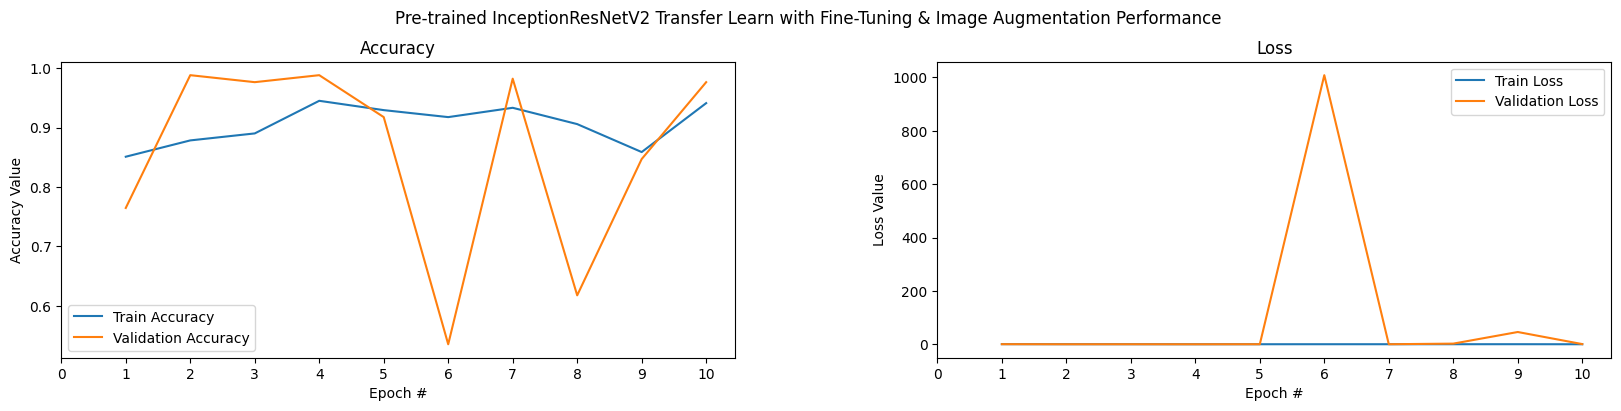

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4))
t = f.suptitle('Pre-trained InceptionResNetV2 Transfer Learn with Fine-Tuning & Image Augmentation Performance ', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,EPOCHS+1))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, EPOCHS+1, 1))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch #')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, EPOCHS+1, 1))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch #')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
y_pred = np.argmax(model.predict(X_val), axis=-1)
print(y_pred)

6/6 [==============================] - 28s 4s/step
[1 0 1 0 1 0 1 0 1 1 0 0 1 0 1 1 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0
 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0
 1 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1 1
 0 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 1 1
 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 0 1]


Confusion Matrix

In [ ]:
y_ = np.argmax(Y_val, axis=-1)
print(y_)

[1 0 1 0 1 0 1 0 1 1 0 0 1 0 1 1 0 1 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0
 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0
 1 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1 0
 0 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 1 1
 0 1 0 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 0 1]


True positive =  76
False positive =  4
False negative =  0
True negative =  90




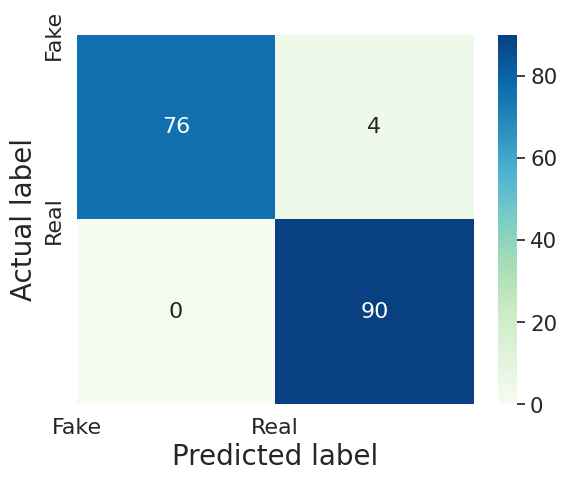

In [ ]:
def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    np.set_printoptions(suppress=True)  # Suppress scientific notation
    print('True positive = ', cm[0][0])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True negative = ', cm[1][1])
    print('\n')
    df_cm = pd.DataFrame(cm, range(2), range(2))
    sn.set(font_scale=1.4) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='g', cmap = 'GnBu') # fmt='g' for no scientific notation
    plt.ylabel('Actual label', size=20)
    plt.xlabel('Predicted label', size=20)
    plt.xticks(np.arange(2), ['Fake', 'Real'], size=16)
    plt.yticks(np.arange(2), ['Fake', 'Real'], size=16)
    plt.ylim([2, 0])
    plt.show()

print_confusion_matrix(y_, y_pred)

In [ ]:
from sklearn import metrics

print("ROC AUC Score:", metrics.roc_auc_score(y_, y_pred))
print("AP Score:", metrics.average_precision_score(y_, y_pred))
print()
print(metrics.classification_report(y_,y_pred > 0.5))

ROC AUC Score: 0.975
AP Score: 0.9574468085106383

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        80
           1       0.96      1.00      0.98        90

    accuracy                           0.98       170
   macro avg       0.98      0.97      0.98       170
weighted avg       0.98      0.98      0.98       170

